                     Language      Bytes  % of total
1                         Ada      89080    0.002528
2                         Arc     236701    0.006716
3                    Assembly     390769    0.011088
4                         Awk      50685    0.001438
5                   Batchfile     207831    0.005897
7                           C  297764330    8.448636
8                          C#    6622473    0.187903
9                         C++  276736930    7.852013
11                      CMake    3065302    0.086974
12                        CSS    1453041    0.041228
14                      Clean    1016354    0.028838
15                Common Lisp     406724    0.011540
17                       Cool     153445    0.004354
18                       Cuda    5769862    0.163712
19   DIGITAL Command Language     273782    0.007768
20                 Dockerfile      70634    0.002004
22                 Emacs Lisp    3499968    0.099307
26                      Forth     141996    0.

(-1.110578848028546,
 1.1139979218632445,
 -1.1014136643830632,
 1.1000673173515745)

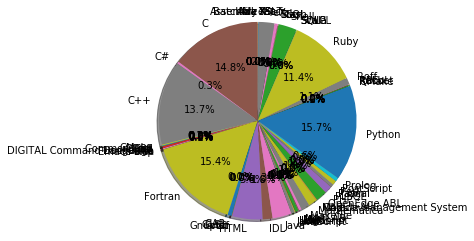

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('languages.csv')

#drop the unnecesary index column
df = df.drop(df.columns[0], axis=1)
    
#cast the Bytes column to int64
df = df[pd.to_numeric(df.Bytes,errors='coerce').notnull()]
df.Bytes = df['Bytes'].astype(str).astype(int)
df.sort_values(by='Bytes', ascending=False)

#group the rows by languages and sum on the Bytes column
lang = df.groupby('Language', as_index=False)['Bytes'].sum()

#create a new column for the percent that language occupies
lang['% of total'] = lang.Bytes / lang.Bytes.sum() * 100

#filtering out some strange data
lang = lang[lang['% of total'] > 0.001]
lang = lang[lang['Language'] != "sed"] #hmm - not sure why sed takes up such a large %
lang = lang[lang['Language'] != "Jupyter Notebook"]

print(lang)

#Pie chart time!
fig1, ax1 = plt.subplots()
ax1.pie(lang[lang.columns[1]], labels=lang[lang.columns[0]], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

Questions:

1. Why is sed so big
2. How many files are the bytes spread across (will require more work on the csv)